In [1]:
import matplotlib.pyplot as plt
import aplpy
import numpy as np
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
#plt.style.use(astropy_mpl_style)

In [2]:
hill_file = get_pkg_data_filename('fits_files/VelaC_500_hill_regs_regrid_30as_pix.fits')
image_file = get_pkg_data_filename('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_polint.fits')
mask_file = get_pkg_data_filename('fits_files/VelaC_500_hill_regs_regrid_30as_pix.fits')
hdup = fits.open('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_polint.fits')

#print (hdup)
#hdup.info()

print(repr(hdup[0].header))

SIMPLE  =                    T /image conforms to FITS standard                 
BITPIX  =                  -64 /bits per data value                             
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                  279 /                                                
NAXIS2  =                  221 /                                                
EXTEND  =                    T /file may contain extensions                     
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =        181.333338723 / Pixel coordinate of reference point            
CRPIX2  =        132.333337262 / Pixel coordinate of reference point            
CDELT1  =    -0.00833333308499 / [deg] Coordinate increment at reference point  
CDELT2  =     0.00833333308499 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'             

In [3]:
fits.info(image_file)
fits.info(mask_file)
fits.info(hill_file)

Filename: fits_files_2/VelaC_500_intermediate_regrid_30as_pix_polint.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      33   (279, 221)   float64   
Filename: fits_files/VelaC_500_hill_regs_regrid_30as_pix.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      33   (279, 221)   int16   
Filename: fits_files/VelaC_500_hill_regs_regrid_30as_pix.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      33   (279, 221)   int16   


In [4]:
image_data = fits.getdata(image_file, ext=0)
mask_data = fits.getdata(mask_file, ext=0)
hill_data = fits.getdata(hill_file, ext=0)

print(image_data.shape)
print(mask_data.shape)
print(hill_data.shape)

(221, 279)
(221, 279)
(221, 279)


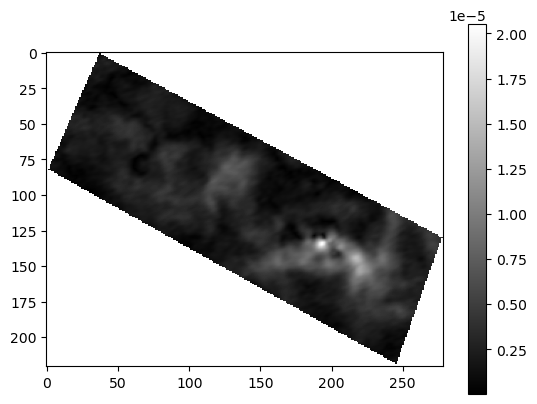

In [6]:
plt.figure()
plt.imshow(image_data, cmap = 'gray')
#plt.imshow(mask_data, cmap = 'gray')

plt.colorbar()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


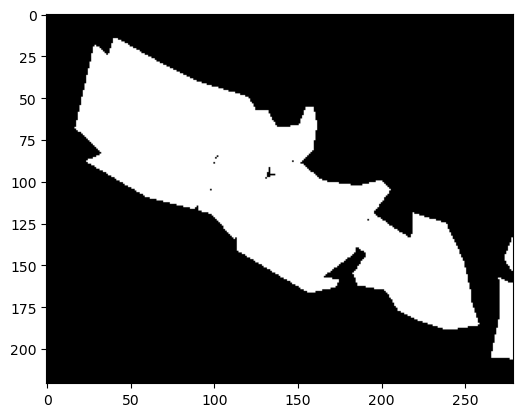

In [8]:
test_hill = mask_data>0
i_hill = test_hill.nonzero()
p_hill = hdup[0].data[i_hill]
print(mask_data)
print(test_hill)
plt.imshow(test_hill, cmap = 'gray')

np.empty((221, 279))
hdu = fits.PrimaryHDU(np.empty((221, 279)))

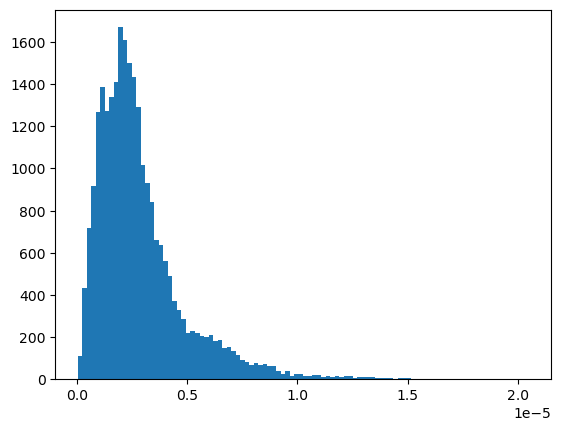

In [9]:
histogram = plt.hist(image_data.flat, bins = 100)

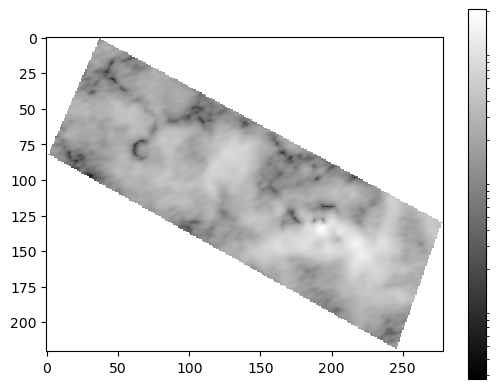

In [10]:
from matplotlib.colors import LogNorm
plt.imshow(image_data, cmap = 'gray', norm = LogNorm())
cbar = plt.colorbar(ticks = [4.e3, 1.e4, 2.e4])

In [11]:
from astropy.visualization import make_lupton_rgb

VelaQ = get_pkg_data_filename('fits_files/VelaC_500_intermediate_regrid_30as_pix_Q.fits')
VelaI = get_pkg_data_filename('fits_files/VelaC_500_intermediate_regrid_30as_pix_I.fits')
VelaU = get_pkg_data_filename('fits_files/VelaC_500_intermediate_regrid_30as_pix_U.fits')

In [12]:
VelaQ1 = fits.open('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_Q.fits')
VelaI1 = fits.open('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_I.fits')
VelaU1 = fits.open('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_U.fits')
print (fits.info('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_Q.fits'))
print (fits.info('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_I.fits'))
print (fits.info('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_U.fits'))

Filename: fits_files_2/VelaC_500_intermediate_regrid_30as_pix_Q.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      33   (279, 221)   float64   
None
Filename: fits_files_2/VelaC_500_intermediate_regrid_30as_pix_I.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      33   (279, 221)   float64   
None
Filename: fits_files_2/VelaC_500_intermediate_regrid_30as_pix_U.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      33   (279, 221)   float64   
None


In [13]:
Q1 = VelaQ1[0].data
I = VelaI1[0].data
U = VelaU1[0].data

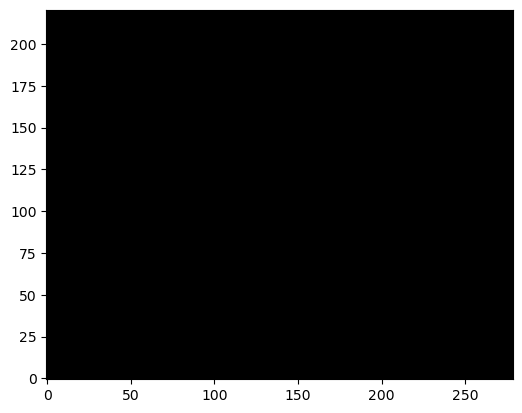

In [28]:
rgb_default = make_lupton_rgb(Q1, I, U, stretch = 1.5, Q = 10)
plt.imshow(rgb_default, origin = 'lower')

- package - aplpy
- histogram

## Using aplpy

INFO: Auto-setting vmin to -5.000e-01 [aplpy.core]
INFO: Auto-setting vmax to  5.550e+00 [aplpy.core]
INFO: Auto-setting vmin to -5.000e-01 [aplpy.core]
INFO: Auto-setting vmax to  5.550e+00 [aplpy.core]
INFO: Auto-setting vmin to -5.000e-01 [aplpy.core]
INFO: Auto-setting vmax to  5.550e+00 [aplpy.core]


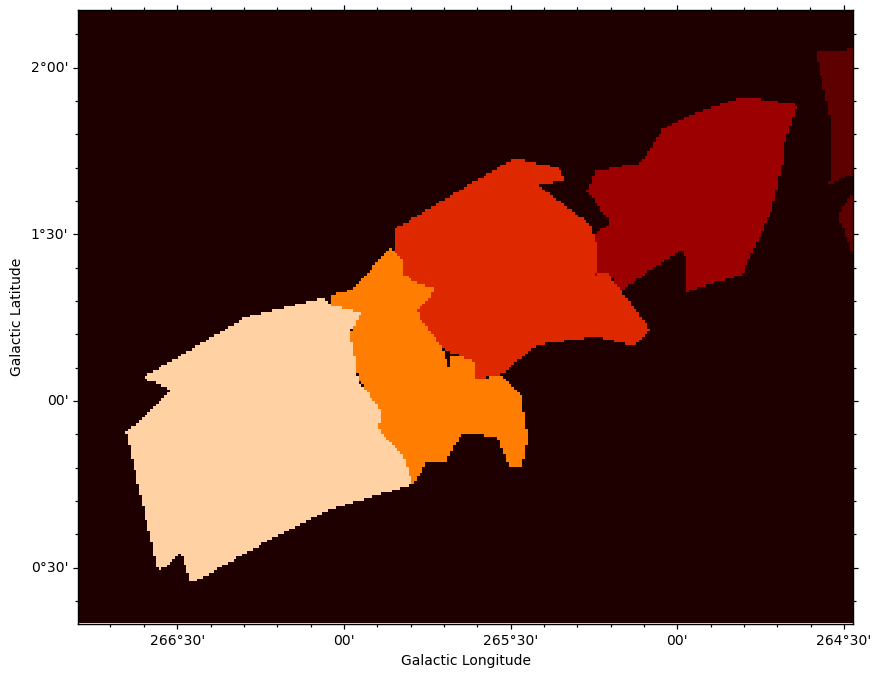

In [ ]:
vela = aplpy.FITSFigure('fits_files/VelaC_500_hill_regs_regrid_30as_pix.fits')
vela.show_grayscale()
vela.show_colorscale()
vela.show_colorscale(cmap = 'gist_heat')

In [44]:
##plotting using aplpy
#vela_ang = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_ang.fits')
#vela_ang.show_grayscale()

#vela_I = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_I.fits')
#vela_I.show_grayscale()

#vela_p = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_p.fits')
#vela_I.show_grayscale()

#vela_polint = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_polint.fits')
#vela_polint.show_grayscale()

#vela_Q = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_Q.fits')
#vela_Q.show_grayscale()

#vela_S = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_S.fits')
#vela_S.show_grayscale()

#vela_s2n = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_s2n_polint.fits')
#vela_s2n.show_grayscale()

#vela_U = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_U.fits')
#vela_U.show_grayscale()

#vela_var_polint = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_var_polint.fits')
#vela_var_polint.show_grayscale()

vela_ang_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_ang.fits', ext=0)
vela_I_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_I.fits', ext=0)
vela_p_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_p.fits', ext=0)
vela_polint_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_polint.fits', ext = 0)
vela_Q_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_Q.fits', ext=0)
vela_S_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_S.fits', ext = 0)
vela_s2n_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_s2n_polint.fits', ext = 0)
vela_U_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_U.fits', ext = 0)
vela_var_polint_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_var_polint.fits', ext=0)


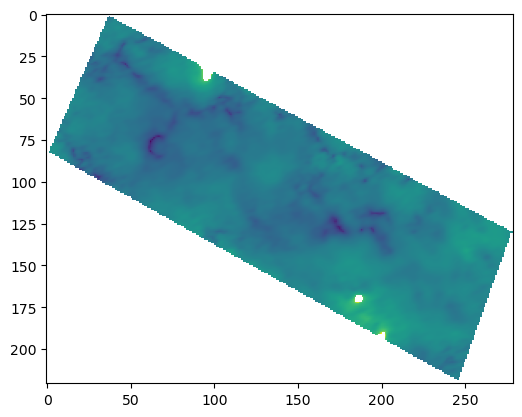

In [56]:
#mask = np.logical_and(mask_data>0, vela_p_data)
plt.imshow(vela_p_data, norm = LogNorm())


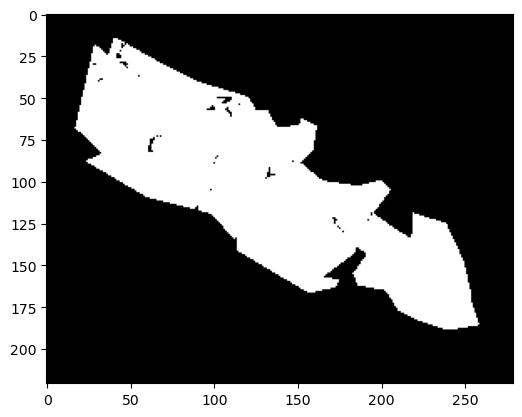

In [48]:
# vela =  get_pkg_data_filename('fits_files/VelaC_500_intermediate_regrid_30as_pix_polint.fits')
#vela_data = fits.getdata(vela)

#for x,y in zip(range(len(asdf)), range(len(asdf[0]))):
 #   print (vela_data[x])

mask = np.logical_and(mask_data>0, image_data>3*np.sqrt(vela_var_polint_data))
i_good = mask.nonzero()

plt.imshow(image_data)
plt.imshow(mask, cmap='gray')

#plt.plot(image_data)
new_list = [[]for x in range(len(mask))]

for x in (range(len(mask))):
    for y in (range(len(mask_data[0]))):
        if mask[x,y] == True:
            new_list[x].append(image_data[x,y])
        else:
            new_list[x].append(0.00001)  

#plt.imshow(new_list)

#plt.imshow(mask)

#sigma, s2n
#determine S, N_H [correlations w p]
#gamma^2D
#why does mask==0 give similar angle values t
#plotting fields 
#4 quadrant tangent
#maps??
#check fits -- gamma plot off :(